In [2]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [3]:
path_to_file = "/Users/aditgupta/Google Drive/Research/T2D/all_data.csv"

In [4]:
df = pd.read_csv(path_to_file, header=None, index_col=0)
df2 = df.rename(columns={1:'gene'}, inplace=False)


In [5]:
pd.set_option('display.max_rows', 500)


In [6]:
df2.head()

,gene,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
2,gene,fast_glu_anal,hr_glu_anal,ln_fast_ins_anal,ln_hr_ins_anal,ldl_anal,tchol_anal,hdl_anal,ln_tg_anal,sbp_anal,dbp_anal,ln_creat_anal,ln_bmi_anal
2,KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
2,AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
2,NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
2,IFNG,0.88302,0.10996,0.57891,0.45358,0.60859,0.20033,0.34672,0.4963,0.093361,0.025266,0.10684,0.044815


In [7]:
path_to_file_2 = "/Users/aditgupta/Google Drive/Research/T2D/gene_names.csv"

In [8]:
df3 = pd.read_csv(path_to_file_2, header=None, index_col=0)

In [9]:
df3
df4 = df3.rename(columns={1:'gene'}, inplace=False)


In [10]:
df6 = df4.dropna()
len(df6['gene'].unique())

54

In [11]:
df5 = pd.merge(df2, df6, on='gene', how='inner')
df5

,gene,2,3,4,5,6,7,8,9,10,11,12,13
0,KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
1,AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
2,NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
3,XDH,0.14656,0.0064064,0.2577,0.45331,0.0059308,0.041012,0.049833,0.01674,0.0003066,0.22637,0.5921,0.25526
4,ABCC8,0.21002,0.32226,0.3885,0.50763,0.33093,0.17989,0.25546,0.0090463,0.22065,0.30258,0.23117,0.14762
5,NR1I2,0.19452,0.19478,0.030496,0.50151,0.23753,0.094493,0.48482,0.32032,0.26014,0.094558,0.013724,0.10563
6,ADRB2,0.342,0.55235,0.28463,0.70517,0.58131,0.40002,0.37148,0.12792,0.052308,0.18516,0.64662,0.53593
7,SLC6A2,0.048526,0.22608,0.20456,0.36473,0.15544,0.19732,0.37983,0.021878,0.24144,0.21419,0.31894,0.082936
8,NR3C2,0.12276,0.060501,0.15671,0.20486,0.70618,0.16894,0.029746,0.11311,0.0024767,0.017256,0.59798,0.093292
9,TLR7,0.22451,0.23587,0.028003,0.39595,0.79734,0.049034,0.21935,0.044164,0.080994,0.6158,0.016109,0.17039


In [12]:
df7 = df5.dropna(subset = ['gene'])
wanted = df7['gene'].unique()

In [13]:
string_to_write = "\n".join(wanted)
with open("wanted_20.txt", "w") as f:
    f.write(string_to_write)

In [14]:
df5 = df5.set_index("gene")

In [15]:
df5

,2,3,4,5,6,7,8,9,10,11,12,13
gene,,,,,,,,,,,,
KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
XDH,0.14656,0.0064064,0.2577,0.45331,0.0059308,0.041012,0.049833,0.01674,0.0003066,0.22637,0.5921,0.25526
ABCC8,0.21002,0.32226,0.3885,0.50763,0.33093,0.17989,0.25546,0.0090463,0.22065,0.30258,0.23117,0.14762
NR1I2,0.19452,0.19478,0.030496,0.50151,0.23753,0.094493,0.48482,0.32032,0.26014,0.094558,0.013724,0.10563
ADRB2,0.342,0.55235,0.28463,0.70517,0.58131,0.40002,0.37148,0.12792,0.052308,0.18516,0.64662,0.53593
SLC6A2,0.048526,0.22608,0.20456,0.36473,0.15544,0.19732,0.37983,0.021878,0.24144,0.21419,0.31894,0.082936
NR3C2,0.12276,0.060501,0.15671,0.20486,0.70618,0.16894,0.029746,0.11311,0.0024767,0.017256,0.59798,0.093292


In [16]:
df5 = df5.astype(np.float32)

In [17]:
bmi_chol_synthetic = np.array([0.00079371,0.0038529, 0.0038692, 0.011781, 0.016211, 0.020746,0.023691,0.025932,0.031883,0.03346,0.034047,0.042854,0.045173,0.050497,0.050799, 0.052086,0.052312,0.057919,0.064807,0.071449,0.076924,0.077906,0.082264,0.089912,0.091958,0.1219,0.12432,0.13278,0.1383,0.14031,0.14055,0.14078,0.1431,0.14611,0.14673,0.14708,0.16128,0.16421,0.16679,0.16906,0.17604,0.1802,0.18065,0.18321,0.18527,0.20456,0.20575,0.20709,0.21287,0.21325,0.21722,0.21781,0.23288,0.23341,0.23601,0.2409,0.24554,0.24683,0.25484,0.25776,0.27397,0.28105,0.29017,0.29022,0.29842,0.29855,0.30654,0.31335,0.37021,0.39238,0.39683,0.40993,0.41709,0.42105, 0.42813,0.43352,0.46393,0.47006,0.49413,0.50238,0.51816,0.54151,0.5448,0.55668,0.56105,0.56837,0.58265,0.58482,0.58714, 0.65654, 0.748320,.87922])

In [18]:
fast_insulin_chol_synthetic = np.array([0.001082,0.0016243,0.0032657,0.00684,0.020092,0.020111,0.025561,0.027516,0.03451,0.039758,0.039967,0.040977,0.043761,0.045895,0.046694,0.059579,0.062997,0.064848,0.066645,0.075656,0.079519,0.081533,0.082935,0.085064,0.092022,0.095618,0.1207,0.13698,0.14036,0.14585,0.15562,0.15628,0.15647,0.16976,0.17064,0.17182,0.17717,0.18694,0.18819,0.19511,0.20046,0.20225,0.21469,0.22138,0.22344,0.23146,0.2511,0.25628,0.26565,0.2745,0.28223,0.28629,0.28879,0.31492,0.31855,0.32806,0.33531,0.34331,0.3453,0.34985,0.35149,0.35653,0.36748,0.37015,0.37892,0.38481,0.39798,0.44337,0.44639,0.45117,0.45477,0.45665,0.49636,0.51422,0.52191,0.53849,0.54477,0.54534,0.54534,0.58669,0.59918,0.6225,0.64193,0.64866,0.68637,0.68832,0.69885,0.79252,0.79313,0.83817,0.87012,0.92403])

In [19]:
dbp_chol_synthetic = ([0.000000022889,	0.00004608,	0.000066945,	0.0002258,	0.0034237,	0.0061159,	0.0086051,	0.012321,	0.01724,	0.017506,	0.017629,	0.021403,	0.022644,	0.026643,	0.027507,	0.03064,	0.032194,	0.037891,	0.040311,	0.042834,	0.04507,	0.056788,	0.062628,	0.066,	0.070895,	0.078396,	0.079644,	0.080668,	0.084587,	0.094796,	0.1066,	0.12505,	0.12693,	0.13653,	0.13683,	0.1392,	0.14274,	0.14772,	0.14832,	0.15009,	0.1518,	0.15524,	0.15786,	0.15886,	0.16933,	0.17196,	0.2014,	0.21268,	0.21477,	0.21887,0.23124,	0.2318,	0.24528,	0.26021,	0.30421,	0.31021,	0.32456,	0.32985,	0.3318,	0.3325,	0.34769,	0.377,	0.40029,	0.41799,	0.42065,	0.43235,	0.43409,	0.43653,	0.44024,	0.44377,	0.44631,	0.4549,	0.46191,	0.50597,	0.50714,	0.51038,	0.51911,	0.53315,	0.55076,	0.55447,	0.59437,	0.59619,	0.62384,	0.64004,	0.64375,	0.64566,	0.69843,	0.71624,	0.81511,	0.81722,	0.83469])

In [20]:
ldl_chol_synthetic =np.array([0.00002271,	0.0019724,	0.005225,	0.0070993,	0.013821,	0.017698,	0.03205,	0.03318,	0.034652,	0.037375,	0.037776,	0.04262,	0.045844,0.050506,0.096049,0.098175,0.10914,0.11107,0.16091,0.23101,0.23298,0.23688,0.25183,	0.2586,	0.25892,	0.26087,	0.26893,	0.27817,	0.28713,	0.29328,	0.29358,	0.29782,	0.32235,	0.34152,	0.35174,	0.39349,	0.39484,	0.40354,	0.41942,	0.42151,	0.43616,	0.45121,	0.45228,	0.47121,	0.47167,	0.49364,	0.5025,	0.50697,	0.51358,	0.54785,	0.59367,	0.60314,	0.62833,	0.63492,	0.637,	0.64312,	0.66987,	0.67492,	0.68715,	0.6919,	0.72561,	0.74419,	0.75256,0.12762,	0.1279,	0.13506,	0.13528,	0.14069,	0.1432,	0.14763,	0.14808,0.16969,	0.1757,	0.17892,	0.18104,	0.18112,	0.18771,	0.1918,	0.19445,	0.19961,	0.20277,	0.20388,	0.21006])

In [21]:
tchol_chol_synthetic =np.array([0.023028,	0.023683,	0.026275,	0.031553,	0.032482,	0.035409,	0.038646,	0.041231,	0.046382,	0.049498,	0.054506,	0.055462,	0.097696,	0.10244,	0.10808,	0.11001,	0.11381,	0.1142,	0.12707,	0.1356,	0.14404,	0.14808,	0.15112,	0.15915,	0.16164,	0.16975,	0.17258,	0.17305,	0.17337,	0.17342,	0.17353,	0.17852,	0.18006,	0.18441,	0.18741,	0.19407,	0.19647,	0.20878,	0.21196,	0.21308,	0.21341,	0.22538,	0.22932,	0.23079,	0.2417,	0.24209,	0.25252,	0.25433,	0.27156,	0.27684,	0.27796,	0.28458,	0.29853,	0.30725,	0.31642,	0.31672,	0.32243,	0.33219,	0.34027,	0.34237,	0.34865,	0.35036,	0.35198,	0.35441,	0.36353,	0.38926,	0.3925,	0.39485,	0.41315,	0.41611,	0.42713,	0.43154,	0.43228,	0.43302,	0.43525,	0.43619,	0.43739,	0.44447,	0.44666,	0.47071,	0.47168,	0.47193,	0.47544,	0.47868,	0.48809,	0.49194,	0.50818,	0.50962,	0.58622,	0.60451,	0.73482,	0.85624])

In [22]:
hdl_chol_synthetic =np.array([0.098361,	0.066153,	0.066483,	0.73544,	0.14936,	0.19958,	0.12333,	0.11651,	0.29146,	0.069835,	0.035409,	0.25605,	0.42427,	0.44147,	0.036447,	0.26571,	0.10014,	0.091901,	0.071734,	0.38826,	0.23722,	0.48133,	0.33148,	0.65326,	0.36712,	0.85703,	0.12853,	0.2985,	0.038334,	0.46802,	0.85984,	0.0084627,	0.10472,	0.39528,	0.014911,	0.50841,	0.031439,	0.52614,	0.24461,	0.071374,	0.20604,	0.23969,	0.0060076,	0.01476,	0.017621,	0.32182,	0.27989,	0.40879,	0.18327,	0.57533,	0.12175,	0.4216,	0.31119,	0.13936,	0.16718,	0.034834,	0.1032,	0.44723,	0.18294,	0.040425,	0.23195,	0.097182,	0.21658,	0.30095,	0.22983,	0.08572,	0.075104,	0.77831,	0.041199,	0.28124,	0.071699,	0.60126,	0.14164,	0.79716,	0.00035122,	0.31502,	0.04301,	0.49415,	0.093162,	0.015632,	0.31945,	0.097043,	0.34465,	0.013148,	0.37818,	0.62219,	0.041031,	0.61567,	0.3438,	0.6198,	0.47903,	0.25406])

In [23]:
tg_chol_synthetic =np.array([0.30484,	0.52646,	0.15841,	0.31778,	0.61474,	0.29907,	0.12333,	0.11651,	0.44293,	0.0062816,	0.13047,	0.20328,	0.31427,	0.38884,	0.53637,	0.47601,	0.10014,	0.13773,	0.17914,	0.2951,	0.23722,	0.28185,	0.1559,	0.26536,	0.47147,	0.44846,	0.5624,	0.16193,	0.23991,	0.346,	0.17611,	0.090376,	0.23889,	0.74921,	0.18096,	0.24905,	0.017779,	0.18609,	0.061298,	0.6375,	0.045011,	0.49151,	0.032145,	0.18881,	0.016281,	0.3519,	0.43979,	0.12698,	0.52938,	0.048974,	0.35632,	0.3083,	0.11258,	0.10979,	0.17266,	0.20303,	0.13987,	0.26533,	0.10774,	0.1372,	0.81168,	0.54937,	0.13656,	0.068885,	0.060889,	0.41304,	0.32103,	0.22172,	0.39247,	0.28603,	0.23236,	0.71898,	0.11357,	0.10046,	0.073946,	0.0070993,	0.42151,	0.090479,	0.14808,	0.11481,	0.38415,	0.0028781,	0.086141,	0.24907,	0.21421,	0.057202,	0.02279,	0.30149,	0.16871,	0.044359,	0.72324,	0.13307])

In [24]:
sbp_chol_synthetic =np.array([0.048881,	0.15795,	0.22332,	0.10085,	0.35395,	0.33158,	0.57503,	0.37856,	0.60715,	0.0062816,	0.13047,	0.63685,	0.17502,	0.55199,	0.035711,	0.17442,	0.2061,	0.67278,	0.17914,	0.2951,	0.045375,	0.28185,	0.1559,	0.26536,	0.015295,	0.4998,	0.063235,	0.14668,	0.071767,	0.16805,	0.51615,	0.014683,	0.23869,	0.9229,	0.3931,	0.48435,	0.21508,	0.12496,	0.18197,	0.1882,	0.14756,	0.056146,	0.18533,	0.16307,	0.051822,	0.38215,	0.38433,	0.38384,	0.51849,	0.050372,	0.17914,	0.10074,	0.10121,	0.074815,	0.01725,	0.26596,	0.082664,	0.27516,	0.087359,	0.00090579,	0.093278,	0.54344,	0.037843,	0.17183,	0.0019633,	0.21317,	0.0041007,	0.49037,	0.0019146,	0.19775,	0.38966,	0.15525,	0.035243,	0.37852,	0.14316,	0.25654,	0.29893,	0.40836,	0.39502,	0.61305,	0.28117,	0.10515,	0.043879,	0.036276,	0.31775,	0.13476,	0.44591,	0.084892,	0.1913,	0.47918,	0.13747,	0.13968,])

In [25]:
creat_chol_synthetic =np.array([0.084587,	0.079644,	0.26021,	0.1066,	0.022644,	0.16933,	0.32985,	0.69843,	0.83469,	0.1392,	0.51911,	0.2318,	0.0002258,	0.32456,	0.59437,	0.43235,	0.50597,	0.30421,	0.000066945,	0.4549,	0.078396,	0.14772,	0.2014,	0.017506,	0.42065,	0.59619,	0.01724,	0.46191,	0.012321,	0.3318,	0.51038,	0.24528,	0.027507,	0.81511,	0.64566,	0.00004608,	0.34769,	0.03064,	0.056788,	0.23124,	0.21887,	0.15524,	0.066,	0.040311,	0.43653,	0.17196,	0.55447,	0.50714,	0.3325,	0.14832,	0.377,	0.44024,	0.44377,	0.0061159,	0.44631,	0.1518,	0.052694,	0.53315,	0.037891,	0.032194,	0.64375,	0.13653,	0.15786,	0.55076,	0.021403,	0.033125,	0.62384,	0.81722,	0.14274,	0.21477,	0.042834,	0.41799,	0.000000022889,	0.15009,	0.070895,	0.13683,	0.080668,	0.12693,	0.71624,	0.64004,	0.43409,	0.094796,	0.40029,	0.12505,	0.04507,	0.062628,	0.017629,	0.15886,	0.026643,	0.21268,	0.0086051,	0.31021])

In [26]:
hr_chol_synthetic = np.array([0.59476,	0.56512,	0.0086538,	0.86128,	0.21568,	0.025718,	0.24663,	0.015089,	0.49183,	0.26939,	0.48565,	0.39111,	0.11891,	0.21628,	0.11663,	0.10078,	0.36945,	0.38753,	0.36354,	0.4958,	0.012229,	0.44837,	0.35618,	0.29242,	0.36482,	0.71178,	0.32023,	0.16788,	0.15846,	0.18862,	0.16572,	0.25867,	0.32463,	0.32947,	0.39119,	0.33032,	0.2295,	0.38766,	0.61732,	0.020444,	0.21209,	0.65131,	0.097339,	0.22758,	0.68531,	0.35091,	0.70532,	0.23593,	0.25229,	0.50297,	0.0096052,	0.01457,	0.0049673,	0.63597,	0.04075,	0.12664,	0.17032,	0.91281,	0.59688,	0.2071,	0.60585,	0.75725,	0.48368,	0.63592,	0.34985,	0.53849,	0.043761,	0.025561,	0.51422,	0.23469,	0.62664,	0.47856,	0.29674,	0.3098,	0.22596,	0.15556,	0.016035,	0.10192,	0.43323,	0.1491,	0.34485,	0.49222,	0.38403,	0.27897,	0.64731,	0.41591,	0.13736,	0.17717,	0.33531,	0.44337,	0.14347,	0.082935])


In [27]:
scipy.stats.mannwhitneyu(df5[2].values, bmi_chol_synthetic, alternative = 'less') #testing for significance for bmi and the 8 gene 'gene set'

MannwhitneyuResult(statistic=2383.0, pvalue=0.7124961977097628)

In [28]:
#all_sorted_genes is a list of dataframes
all_sorted_genes = []
for column in df5.columns:
    sorted_genes = pd.DataFrame(df5[column].sort_values(ascending=True))
    sorted_genes["rank"] = np.arange(sorted_genes.shape[0]) + 1
    sorted_genes["rank_percentile"] = (sorted_genes.shape[0] - sorted_genes["rank"])/sorted_genes.shape[0]
    all_sorted_genes.append(sorted_genes)


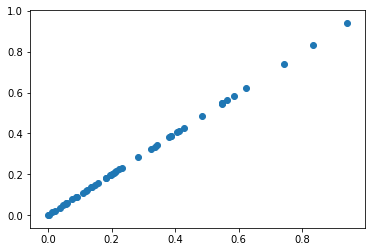

In [29]:
plt.scatter(all_sorted_genes[0][2].values, all_sorted_genes[0][2].values)

In [30]:
all_sorted_genes[4].head() 

,6,rank,rank_percentile
gene,,,
JAK2,0.000048,1,0.979592
CHRM1,0.002456,2,0.959184
XDH,0.005931,3,0.938776
COMT,0.008230,4,0.918367
HTR1B,0.008708,5,0.897959


### ''all_sorted_genes[0][2].values'' --> Get all values in second column of first dataframe

In [31]:
all_sorted_genes[4][6].values

array([4.8200e-05, 2.4558e-03, 5.9308e-03, 8.2299e-03, 8.7083e-03,
       1.4700e-02, 2.0089e-02, 7.2630e-02, 7.9568e-02, 1.0482e-01,
       1.1472e-01, 1.2179e-01, 1.3916e-01, 1.5544e-01, 1.6013e-01,
       1.7531e-01, 1.7958e-01, 1.8269e-01, 1.8956e-01, 1.9928e-01,
       2.1490e-01, 2.2179e-01, 2.2486e-01, 2.3492e-01, 2.3753e-01,
       2.4385e-01, 2.7421e-01, 2.7986e-01, 3.0256e-01, 3.1253e-01,
       3.3033e-01, 3.3093e-01, 3.8030e-01, 3.8343e-01, 3.9708e-01,
       4.0683e-01, 4.1979e-01, 4.4834e-01, 4.6820e-01, 5.5575e-01,
       5.6572e-01, 5.7467e-01, 5.8131e-01, 6.4057e-01, 6.4315e-01,
       6.7244e-01, 7.0005e-01, 7.0618e-01, 7.9734e-01], dtype=float32)

In [32]:
ranks = pd.DataFrame([x["rank"] for x in all_sorted_genes]).T
ranks.columns = [x.columns[0] for x in all_sorted_genes]

In [33]:
ranks.head()

,2,3,4,5,6,7,8,9,10,11,12,13
CYP17A1,1,33,24,11,28,37,48,42,4,7,8,33
TSPO,2,4,21,14,34,34,40,48,38,28,30,35
KCNH2,3,30,16,30,8,12,25,40,6,17,3,5
SLC7A11,4,13,1,22,45,18,4,1,32,13,14,36
ABL1,5,12,18,21,37,27,27,5,21,24,35,27


In [34]:
#Wilcoxon Rank sum test of Hypercholesteraemia side effect drugs with fasting insulin
scipy.stats.mannwhitneyu(all_sorted_genes[2][4].values,fast_insulin_chol_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=1976.0, pvalue=0.11478177735734046)

In [35]:
#Wilcoxon Rank sum test of Hypercholesteraemia side effect drugs with HRinsulin
scipy.stats.mannwhitneyu(all_sorted_genes[3][5].values,hr_chol_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=2757.0, pvalue=0.9853708001002701)

In [36]:
#Wilcoxon Rank sum test of Hypercholesteraemia side effect drugs with ldl
scipy.stats.mannwhitneyu(all_sorted_genes[4][6].values,ldl_chol_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=2043.0, pvalue=0.5187835306132839)

In [37]:
#Wilcoxon Rank sum test of Hypercholesteraemia side effect drugs with tchol
scipy.stats.mannwhitneyu(all_sorted_genes[5][7].values,tchol_chol_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=1759.0, pvalue=0.016136198934769634)

In [38]:
#Wilcoxon Rank sum test of Hypercholesteraemia side effect drugs with hdl
scipy.stats.mannwhitneyu(all_sorted_genes[6][8].values,hdl_chol_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=2152.0, pvalue=0.3301636942780539)

In [39]:
#Wilcoxon Rank sum test of Hypercholesteraemia side effect drugs with trigylcerides
scipy.stats.mannwhitneyu(all_sorted_genes[7][9].values,tg_chol_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=2149.0, pvalue=0.3254723436711134)

In [40]:
#Wilcoxon Rank sum test of Hypercholesteraemia side effect drugs with Systolic BP
scipy.stats.mannwhitneyu(all_sorted_genes[8][10].values,sbp_chol_synthetic,alternative = 'less')


MannwhitneyuResult(statistic=2255.0, pvalue=0.5025909154086515)

In [41]:
#Wilcoxon Rank sum test of Hypercholesteraemia side effect drugs with Diastolic BP
scipy.stats.mannwhitneyu(all_sorted_genes[9][11].values,dbp_chol_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=2150.0, pvalue=0.3649963159493178)

In [42]:
#Wilcoxon Rank sum test of Hypercholesteraemia side effect drugs with creat
scipy.stats.mannwhitneyu(all_sorted_genes[10][12].values,creat_chol_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=2174.0, pvalue=0.3653447347359903)

In [43]:
#Wilcoxon Rank sum test of Hypercholesteraemia side effect drugs with BMI
scipy.stats.mannwhitneyu(all_sorted_genes[11][13].values,bmi_chol_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=2262.0, pvalue=0.5146786279494867)